## Modelo Preditivo Integrado AutoRegressivo de Média Móveis (ARIMA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clima_india.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


<AxesSubplot:xlabel='date'>

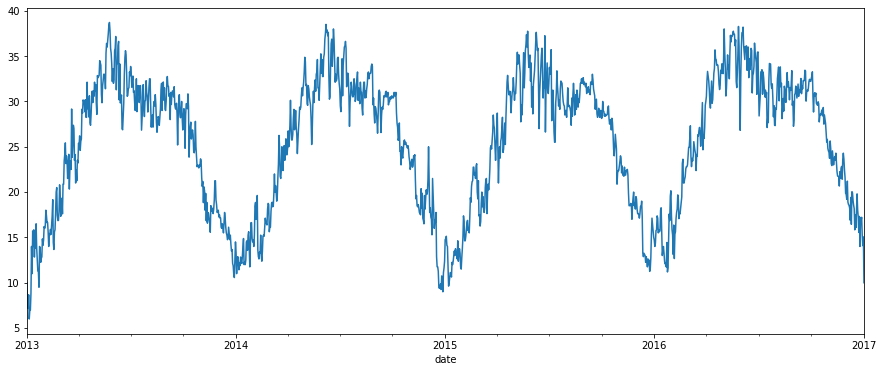

In [2]:
df.meantemp.plot(figsize=(15,6))

<AxesSubplot:xlabel='date'>

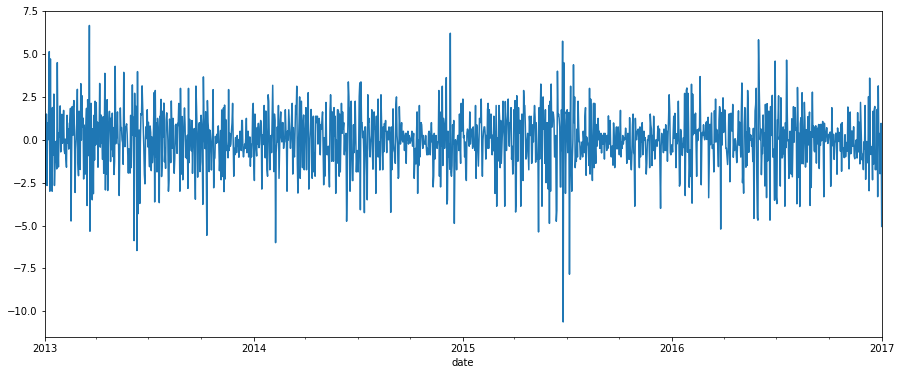

In [9]:
# As diferenças são próximas de zero, e possuem poucos picos, bdemonstrando que se trata de uma série estacionária
df.meantemp.diff().plot(figsize=(15,6))

In [10]:
from statsmodels.tsa.arima_model import ARIMA, ARMA

arima = ARIMA(df.meantemp, freq='D', order=(5, 1, 2)).fit()
(arima.resid ** 2).mean()

2.5666884973297717

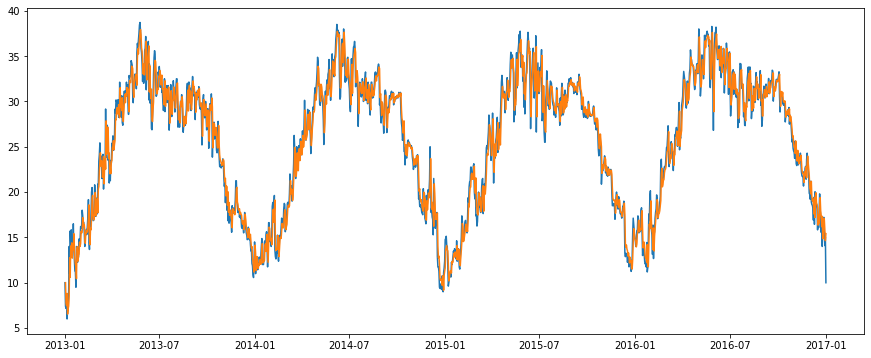

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df.meantemp)
plt.plot(arima.predict(typ='levels'))

In [16]:
# Exibe  previsão do próximo valor
arima.forecast()
## (proxvalor, desvio padrao, intervalo confianca[])

(array([11.37411755]), array([1.6018207]), array([[ 8.23460668, 14.51362843]]))

In [19]:
# Previsão
arima.forecast()[0]

array([11.37411755])

In [21]:
from statsmodels.tsa.arima_model import ARIMA

orders = [(2, 0, 1), (3, 0, 1), (3, 0, 2), (2, 1, 1), (2, 1, 2), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
best = 10000
for order in orders:
    try:
        model = ARIMA(df.meantemp, freq='D', order=order).fit()
        erro = (model.resid ** 2).mean()
        if erro < best:
            print(f'ARIMA{order}, erro={erro}')
            best = erro
    except:
        pass

ARIMA(2, 0, 1), erro 2.6787334694561293
ARIMA(3, 0, 1), erro 2.6780925876433175
ARIMA(3, 0, 2), erro 2.667215145687557
ARIMA(2, 1, 1), erro 2.589471419790499
ARIMA(2, 1, 2), erro 2.551353680625039
